La tabla Psicologia.xlsx contiene las **Evaluaciones psicológicas** que se toman a cada paciente en cada cita.


In [1]:
import pandas as pd
import numpy as np
df_Psic = pd.read_excel("Psoriasis/Psicologia.xlsx")
print(df_Psic.columns)
del df_Psic["Tipo ID"]
import seaborn as sns

Index(['ID', 'Tipo ID', 'Fecha', 'Frecuencia cita', 'Modalidad cita',
       'Pregunta', 'Sí/No', 'Sede de atención'],
      dtype='object')


In [2]:
df_Psic

,ID,Fecha,Frecuencia cita,Modalidad cita,Pregunta,Sí/No,Sede de atención
0,1050380,2019-01-04 10:45:03,4 MESES,CONSULTA PRESENCIAL,DLQI >20,NO,Almacentro Piso 11
1,1050380,2019-01-04 10:45:03,4 MESES,CONSULTA PRESENCIAL,WHO < 50,NO,Almacentro Piso 11
2,1050380,2019-01-04 10:45:03,4 MESES,CONSULTA PRESENCIAL,Depresion mayor,NO,Almacentro Piso 11
3,1050380,2019-01-04 10:45:03,4 MESES,CONSULTA PRESENCIAL,Depresion mayor + ansiedad,NO,Almacentro Piso 11
4,1050380,2019-01-04 10:45:03,4 MESES,CONSULTA PRESENCIAL,Trastorno de ansiedad severa,NO,Almacentro Piso 11
...,...,...,...,...,...,...,...
43896,1947230,2020-05-30 14:13:01,6 MESES,SEGUIMIENTO TELEFONICO,DLQI 6-10,NO,Almacentro Piso 11
43897,1947230,2020-05-30 14:13:01,6 MESES,SEGUIMIENTO TELEFONICO,WHO > 70,SI,Almacentro Piso 11
43898,1947230,2020-05-30 14:13:01,6 MESES,SEGUIMIENTO TELEFONICO,Depresion leve,NO,Almacentro Piso 11
43899,1947230,2020-05-30 14:13:01,6 MESES,SEGUIMIENTO TELEFONICO,Alta por Psicología,NO,Almacentro Piso 11


In [3]:
df_Psic_v2 = df_Psic.groupby(["ID","Fecha"]). count()
df_Psic_v2.reset_index(inplace=True)
df_Psic_v2

del df_Psic_v2["Frecuencia cita"]
del df_Psic_v2["Modalidad cita"]
del df_Psic_v2["Pregunta"]
del df_Psic_v2["Sí/No"]
del df_Psic_v2["Sede de atención"]

preguntas = pd.unique(df_Psic['Pregunta']).tolist()
indices = df_Psic_v2.index

df_Psic_v2["Ano"]=pd.DatetimeIndex(df_Psic_v2["Fecha"]).year
df_Psic_v2["Mes"]=pd.DatetimeIndex(df_Psic_v2["Fecha"]).month
df_Psic_v2["Dia"]=pd.DatetimeIndex(df_Psic_v2["Fecha"]).day

for p in preguntas:
    df_Psic_v2[p] = 0
    for ind_v2 in indices:
        ID = df_Psic_v2["ID"][ind_v2]
        Fecha = df_Psic_v2["Fecha"][ind_v2]
        ind_v1 = df_Psic[(df_Psic["ID"]==ID) & (df_Psic["Fecha"]==Fecha)  & (df_Psic["Pregunta"]==p)].index.tolist()
        if ind_v1:
            if df_Psic["Sí/No"][ind_v1[0]]=="SI":
                df_Psic_v2[p][ind_v2] = 1
            else:
                df_Psic_v2[p][ind_v2] = 0
                
del df_Psic_v2["DLQI >20"]
del df_Psic_v2["DLQI 11-20"]
del df_Psic_v2["DLQI 6-10"]


del df_Psic_v2["WHO < 50"]
del df_Psic_v2["WHO entre 50-70"]
del df_Psic_v2["WHO > 70"]

df_Psic_v2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ID,Fecha,Ano,Mes,Dia,Depresion mayor,Depresion mayor + ansiedad,Trastorno de ansiedad severa,Trastorno severo de la esfera sexual,Depresion moderada,Trastornos de adaptacion,Problemas familiares,Trastorno leve-moderado de la esfera sexual,Depresion leve,Alta por Psicología,OTRO MOTIVO
0,501389,2020-01-08 16:38:00,2020,1,8,0,0,0,0,0,0,0,0,0,0,0
1,501389,2020-01-08 16:38:45,2020,1,8,0,0,0,0,0,0,0,0,0,0,0
2,502369,2018-12-05 10:08:20,2018,12,5,0,0,0,0,0,0,0,0,0,0,0
3,502369,2019-04-24 14:04:37,2019,4,24,0,0,0,0,0,0,0,0,0,0,0
4,502369,2019-11-08 16:41:58,2019,11,8,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df_Psic_v2["Depresion TOTAL"] = (10 * df_Psic_v2["Depresion mayor"]) + (6 * df_Psic_v2["Depresion moderada"]) + (3 * df_Psic_v2["Depresion leve"]) + (10 * df_Psic_v2["Depresion mayor + ansiedad"])

df_Psic_v2["Ansiedad TOTAL"] =  (10 * df_Psic_v2["Trastorno de ansiedad severa"]) + (5 * df_Psic_v2["Depresion mayor + ansiedad"])

df_Psic_v2["Trastorno Sexual TOTAL"] =  (10 * df_Psic_v2["Trastorno severo de la esfera sexual"]) + (10 * df_Psic_v2["Trastorno leve-moderado de la esfera sexual"])

df_Psic_v2["Psi TOTAL"] = (0.2 * df_Psic_v2["Depresion TOTAL"]) + (0.2 * df_Psic_v2["Ansiedad TOTAL"]) + (0.3 * df_Psic_v2["Trastorno Sexual TOTAL"]) + (0.1 * df_Psic_v2["Trastornos de adaptacion"]) + (0.1 * df_Psic_v2["Problemas familiares"]) + (0.1 * df_Psic_v2["OTRO MOTIVO"])

In [5]:
df_Psic_v2

,ID,Fecha,Ano,Mes,Dia,Depresion mayor,Depresion mayor + ansiedad,Trastorno de ansiedad severa,Trastorno severo de la esfera sexual,Depresion moderada,Trastornos de adaptacion,Problemas familiares,Trastorno leve-moderado de la esfera sexual,Depresion leve,Alta por Psicología,OTRO MOTIVO,Depresion TOTAL,Ansiedad TOTAL,Trastorno Sexual TOTAL,Psi TOTAL
0,501389,2020-01-08 16:38:00,2020,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,501389,2020-01-08 16:38:45,2020,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,502369,2018-12-05 10:08:20,2018,12,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,502369,2019-04-24 14:04:37,2019,4,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,502369,2019-11-08 16:41:58,2019,11,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,3499636,2019-05-08 09:03:59,2019,5,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2584,3499636,2019-11-12 16:04:47,2019,11,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2585,3499725,2019-05-24 14:25:43,2019,5,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2586,3499725,2019-11-14 16:40:46,2019,11,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


Hay inconsistencias entre el Total reportado en la tabla original y el calculado a partir de la calificación de cada uña. Esto se observa también en EXCEL.

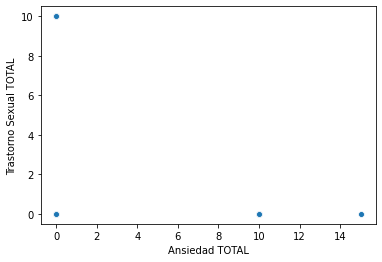

In [6]:
sns.scatterplot(x="Ansiedad TOTAL", y="Trastorno Sexual TOTAL", data=df_Psic_v2)

In [7]:
import unicodedata
def rem_accents(text):
    return unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")


In [8]:
columns = df_Psic_v2.columns
new_columns = {}
for i in columns:
    new_columns[i] = rem_accents(i).lower().replace(" ","_")

for i in columns:
    df_Psic_v2[i] = df_Psic_v2[i].apply(lambda x: rem_accents(str(x).lower()))
    
df_Psic_v2.rename(columns=new_columns, inplace=True)
df_Psic_v2.head()

,id,fecha,ano,mes,dia,depresion_mayor,depresion_mayor_+_ansiedad,trastorno_de_ansiedad_severa,trastorno_severo_de_la_esfera_sexual,depresion_moderada,trastornos_de_adaptacion,problemas_familiares,trastorno_leve-moderado_de_la_esfera_sexual,depresion_leve,alta_por_psicologia,otro_motivo,depresion_total,ansiedad_total,trastorno_sexual_total,psi_total
0,501389,2020-01-08 16:38:00,2020,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,501389,2020-01-08 16:38:45,2020,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,502369,2018-12-05 10:08:20,2018,12,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,502369,2019-04-24 14:04:37,2019,4,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,502369,2019-11-08 16:41:58,2019,11,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [10]:
df_Psic_v2["fecha"] = pd.to_datetime(df_Psic_v2["fecha"])
df_Psic_v2

,id,fecha,ano,mes,dia,depresion_mayor,depresion_mayor_+_ansiedad,trastorno_de_ansiedad_severa,trastorno_severo_de_la_esfera_sexual,depresion_moderada,trastornos_de_adaptacion,problemas_familiares,trastorno_leve-moderado_de_la_esfera_sexual,depresion_leve,alta_por_psicologia,otro_motivo,depresion_total,ansiedad_total,trastorno_sexual_total,psi_total
0,501389,2020-01-08 16:38:00,2020,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,501389,2020-01-08 16:38:45,2020,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,502369,2018-12-05 10:08:20,2018,12,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,502369,2019-04-24 14:04:37,2019,4,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,502369,2019-11-08 16:41:58,2019,11,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,3499636,2019-05-08 09:03:59,2019,5,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2584,3499636,2019-11-12 16:04:47,2019,11,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2585,3499725,2019-05-24 14:25:43,2019,5,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2586,3499725,2019-11-14 16:40:46,2019,11,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [11]:
df_Psic_v2.to_csv("Psicologia_DF.csv", index = False)